In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Reviews.csv")
df=df[:30]
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [6]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]', '')

stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.Text.head()


0    bought several vitality canned dog food produc...
1    product arrived labelled lumbo halted peanuts....
2    connection around centuries. light, pillow cit...
3    looking secret ingredient robitussin believe f...
4    great staff great price. wide assortment mummy...
Name: Text, dtype: object

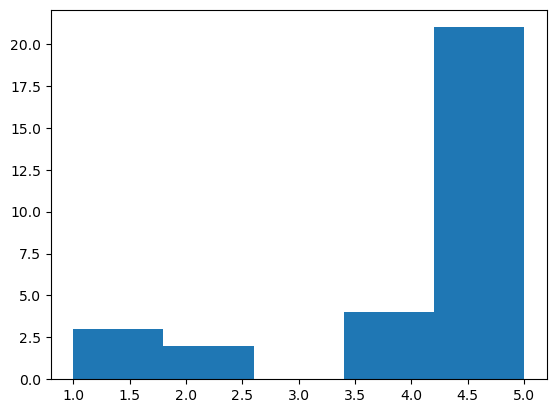

Score
1     3
2     2
4     4
5    21
Name: Id, dtype: int64


In [7]:
reviews=df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [8]:
score_1 = reviews[reviews['Score'] == 1].sample(n=min(9, len(reviews[reviews['Score'] == 1])), replace=False)
score_2 = reviews[reviews['Score'] == 2].sample(n=min(9, len(reviews[reviews['Score'] == 2])), replace=False)
score_3 = reviews[reviews['Score'] == 3].sample(n=min(9, len(reviews[reviews['Score'] == 3])), replace=False)
score_4 = reviews[reviews['Score'] == 4].sample(n=min(9, len(reviews[reviews['Score'] == 4])), replace=False)
score_5 = reviews[reviews['Score'] == 5].sample(n=min(9, len(reviews[reviews['Score'] == 5])), replace=False)


In [9]:
reviews_sample = pd.concat([score_1, score_2, score_3, score_4, score_5], axis=0)
reviews_sample.reset_index(drop=True, inplace=True)

print(reviews_sample.groupby('Score').count().Id)


Score
1    3
2    2
4    4
5    9
Name: Id, dtype: int64


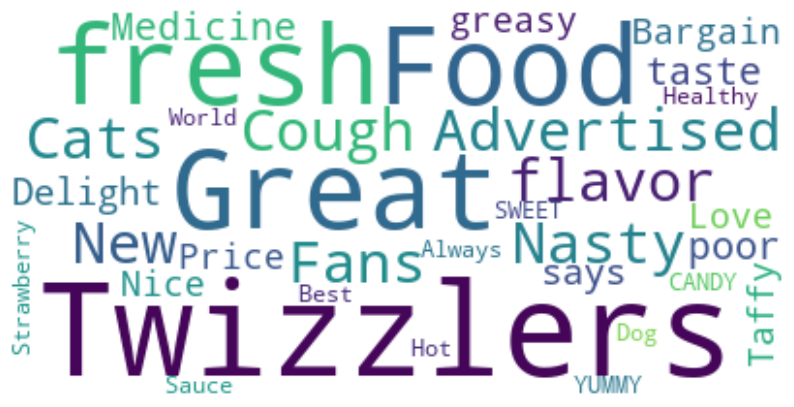

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all summaries into a single string
reviews_str = " ".join(reviews_sample["Summary"].to_numpy())

# Generate word cloud
wordcloud = WordCloud(background_color='white').generate(reviews_str)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or #5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

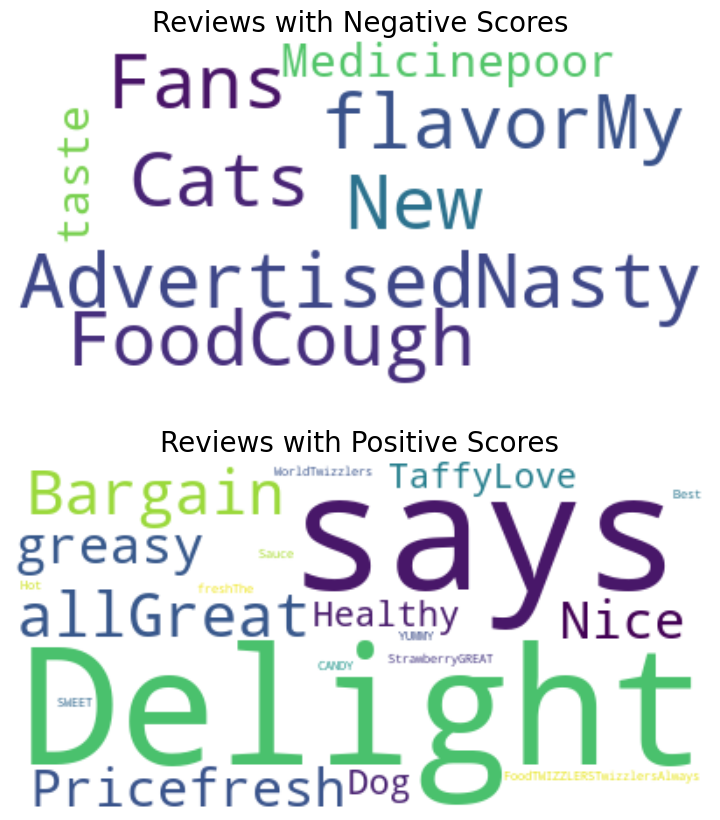

In [13]:
# Create wordclouds
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

In [17]:
!pip install vaderSentiment

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --------- ------------------------------ 30.7/126.0 kB ? eta -:--:--
   --------- ------------------------------ 30.7/126.0 kB ? eta -:--:--
   -------------------------------------  122.9/126.0 kB 901.1 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 741.7 kB/s eta 0:00:00


In [18]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp = sns.color_palette()
analyzer = SentimentIntensityAnalyzer()
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [19]:
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.258,0.644,0.099,-0.5719
2,0.126,0.623,0.250,0.7880
3,0.000,0.868,0.132,0.4404
4,0.000,0.455,0.545,0.9186


In [21]:
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanuts....,0.258,0.644,0.099,-0.5719
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","connection around centuries. light, pillow cit...",0.126,0.623,0.250,0.7880


In [26]:
df_c['Sntiment']=np.where(df_c['compound']>=0,'Positive', 'Negative')
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Swntiment,Sntiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413,Positive,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanuts....,0.258,0.644,0.099,-0.5719,Negative,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","connection around centuries. light, pillow cit...",0.126,0.623,0.250,0.7880,Positive,Positive
